In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv('../data/german_credit_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

In [4]:
job_dic = {
    0: 'unskilled non res',
    1: 'unskilled resident',
    2: 'skilled',
    3: 'highly skilled'
}
df.job = df.job.map(job_dic)

In [5]:
numerical_features = ['age', 'credit_amount', 'duration']
categorical_features = ['sex', 'job', 'housing', 'saving_accounts', 'checking_account', 'purpose']

In [6]:
df = df.fillna('undefined')

In [7]:
df['target'] = (df.risk == 'bad').astype(int)
df.sample(3)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,target
138,35,male,skilled,own,undefined,moderate,2728,15,radio/TV,good,0
13,60,male,unskilled resident,own,little,little,1199,24,car,bad,1
234,42,male,unskilled resident,own,little,undefined,1544,4,radio/TV,good,0


In [ ]:
print(len(y_pred))
print(y_test.sum())
print()
for limiar in np.linspace(0.01, 0.99, 10):
    pred = (y_pred >= limiar).astype(int)

    fp = ((pred == 1) & (y_test == 0)).sum()
    negatives = (y_test == 0).sum()

    false_positive_rate = fp / negatives

    ## precision and recall
    precision = ((pred == 1) & (y_test == 1)).sum() / (pred == 1).sum()
    recall = ((pred == 1) & (y_test == 1)).sum() / (y_test == 1).sum()

    print(false_positive_rate, round(100*precision), round(100*recall))

    perdidos = fp
    evitados = ((pred == 1) & (y_test == 1)).sum()
    balanco = evitados - perdidos/2

    if balanco > 0:
        print('limiar', limiar)
        print('perdidos', perdidos)
        print('evitados', evitados)

        print('balanco' ,balanco)
        print('------------------')
        print()





In [8]:
    
def cal(proporcao_default, ratio_prejuizo, precisao = 0.3, recall = 0.3):
    if ratio_prejuizo < 0:
        ratio_prejuizo = -ratio_prejuizo*-1


    perdidos_esperado = 100*(1-proporcao_default)*(1 - precisao)
    evitados_esperado = 100*proporcao_default*recall

    valor_esperado = evitados_esperado*ratio_prejuizo - perdidos_esperado

    valor_esperado_percentual = valor_esperado/(100*(1-proporcao_default))

    return(valor_esperado_percentual)

In [9]:
cal(0.3, 1, precisao = 0.3, recall = 0.3)

-0.5714285714285714

In [10]:
- np.linspace(0, 10, 5)[::-1]

array([-10. ,  -7.5,  -5. ,  -2.5,  -0. ])

In [11]:
def plot_default_and_loss(precisao, recall, 
         range_proporcao_default = (0.01, 0.99), range_ratio_prejuizo = (-5, 10),
         destacar_ponto = False):

    x = []
    y = []
    c = []

    r, g, b = [], [], []

    tam = 200
    for i in np.linspace(range_proporcao_default[0], range_proporcao_default[1], tam):
        for j in np.linspace(range_ratio_prejuizo[0], range_ratio_prejuizo[1], tam):
            x.append(i)
            y.append(j)

            valor_esperado = cal(i, j, precisao = precisao, recall = recall)

            red = np.clip(valor_esperado, -10, 0) * -1
            blue = np.clip(valor_esperado, 0, 10)
            green = 0

            r.append(red)
            g.append(green)
            b.append(blue)

    r = np.array(r)/np.max(r)
    b = np.array(b)/np.max(b)

    r = (r**0.7).clip(0, 0.7)
    b = (b**0.7).clip(0, 0.7)
    g = b*0.4

    c = np.array([r, g, b]).T


    ## scatter with square markers
    plt.figure(figsize=(10.,5))
    plt.scatter(x, y, c = c, alpha = 0.3, s = 65,
                marker = 'o')

    plt.title(f'precisao = {precisao}, recall = {recall}')
    
    plt.xlabel('proporcao_default')
    plt.ylabel('ratio_prejuizo')
                

    ## change plot frame color
    ax = plt.gca()

    ## hide all spin
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ## hide ticks
    ax.tick_params(axis='both', which='both', length=0)


    ax.set_xlim(range_proporcao_default)
    ax.set_ylim(range_ratio_prejuizo)

    if destacar_ponto is not False:
        plt.scatter(destacar_ponto[0], destacar_ponto[1], c = 'silver', s = 50, marker = 'o', alpha = 0.5)

In [12]:
def plot_precision_recall(proporcao_default, ratio_prejuizo, 
         range_precisao = (0.01, 0.99), range_recall = (0.01, 0.99),
         destacar_ponto = False):

    x = []
    y = []
    c = []

    r, g, b = [], [], []

    tam = 200
    for i in np.linspace(range_precisao[0], range_precisao[1], tam):
        for j in np.linspace(range_recall[0], range_recall[1], tam):
            x.append(i)
            y.append(j)

            valor_esperado = cal(proporcao_default, ratio_prejuizo, precisao = i, recall = j)

            red = np.clip(valor_esperado, -10, 0) * -1
            blue = np.clip(valor_esperado, 0, 10)
            green = 0

            r.append(red)
            g.append(green)
            b.append(blue)

    r = np.array(r)/np.max(r)
    b = np.array(b)/np.max(b)

    r = (r**0.7).clip(0, 0.7)
    b = (b**0.7).clip(0, 0.7)
    g = b*0.4

    c = np.array([r, g, b]).T


    ## scatter with square markers
    plt.figure(figsize=(10.,5))
    plt.title(f'proporcao_default: {proporcao_default}, ratio_prejuizo: {ratio_prejuizo}')
    
    plt.scatter(x, y, c = c, alpha = 0.3, s = 65,
                marker = 'o')

    plt.xlabel('precision')
    plt.ylabel('recall')
                

    ## change plot frame color
    ax = plt.gca()

    ## hide all spin
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ## hide ticks
    ax.tick_params(axis='both', which='both', length=0)


    ax.set_xlim(range_precisao)
    ax.set_ylim(range_recall)

    if destacar_ponto is not False:
        plt.scatter(destacar_ponto[0], destacar_ponto[1], c = 'silver', s = 50, marker = 'o', alpha = 0.5)

In [13]:
margem_de_lucro = 0.5
avg_loss = df[df.target == 1].credit_amount.mean()
print('avg loss', avg_loss)
avg_earn = df[df.target == 0].credit_amount.mean()*margem_de_lucro
print('avg_earn', avg_earn)
prop = df.target.mean()
print('prop', prop)
ratio = avg_loss/avg_earn
print('ratio', ratio)

avg loss 3938.1266666666666
avg_earn 1492.7285714285715
prop 0.3
ratio 2.6382067993096694


In [14]:
precisao = 0.53
recall = 0.67

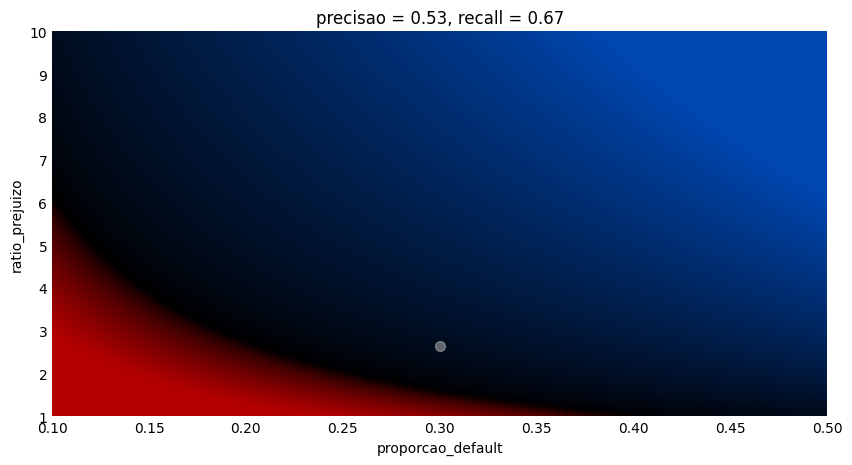

In [15]:
plot_default_and_loss(precisao = precisao, recall = recall,
     range_proporcao_default = (0.1, 0.5),
        range_ratio_prejuizo = (1, 10),
        destacar_ponto=(prop, ratio))

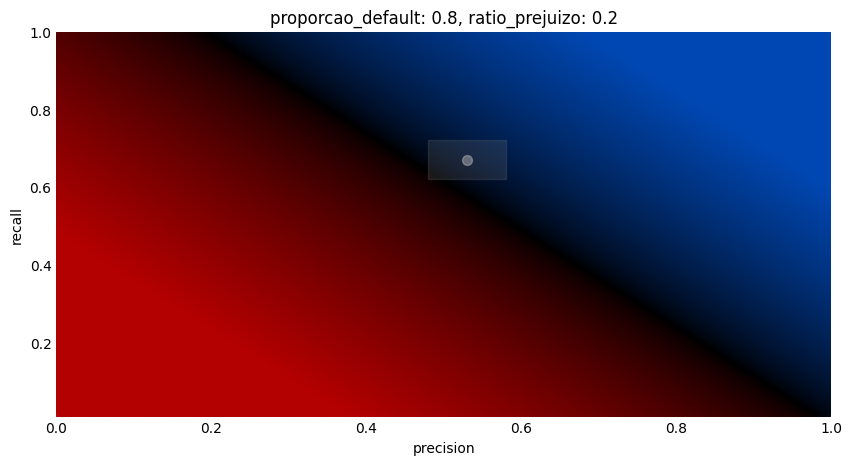

In [16]:
p, r = prop, ratio
p, r = 0.8, 0.2

plot_precision_recall(proporcao_default = p, ratio_prejuizo = r,
         range_precisao = (0.0, 1), range_recall = (0.01, 1),
         destacar_ponto = (precisao, recall))

area = 0.05
x_paint = (precisao - area, precisao + area)
y_paint = (recall - area, recall + area)

## paint region between xpaint and ypaint
plt.fill_between(x_paint, y_paint[0], y_paint[1], color = 'gray', alpha = 0.2)